# Aaron Jones Final Project

Please complete your final project in the space below. Do not forget to explain and interpret the process. You can find the rubric here: https://nathanmichalewicz.org/courses/python/assignments/project-rubric.html

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Set the style for the visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Function to convert string numbers with commas to numeric values
def convert_to_numeric(val):
    if isinstance(val, str):
        # Remove commas and convert to float
        return float(re.sub(r',', '', val))
    return val

In [9]:
df = pd.read_csv('/content/listeners (4).csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist       2500 non-null   object
 1   Listeners    2500 non-null   object
 2   Daily Trend  2500 non-null   object
 3   Peak         2500 non-null   int64 
 4   PkListeners  2500 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.8+ KB


In [11]:
# Display the first few rows to understand the structure
print("First 5 rows of the data:")
print(df.head())

# Convert string numbers with commas to numeric values
numeric_columns = ['Listeners', 'Daily Trend', 'PkListeners']
for col in numeric_columns:
    df[col] = df[col].apply(convert_to_numeric)

First 5 rows of the data:
         Artist    Listeners Daily Trend  Peak  PkListeners
0    The Weeknd  107,592,328    -138,880     1  113,034,886
1  Taylor Swift  101,003,302         889     2  101,003,302
2    Ed Sheeran   76,475,126     -68,137     2   87,934,910
3      Dua Lipa   76,421,916     -71,356     4   77,778,397
4     Bad Bunny   76,162,057    -199,052     3   83,950,570


In [12]:
print("\n--- Basic Statistics ---")

# For numeric data
numeric_stats = df.describe(percentiles=[.25, .5, .75])
print("\nNumeric Statistics:")
print(numeric_stats)

# Calculate modes for numeric columns
numeric_modes = {}
for col in df.select_dtypes(include=['number']).columns:
    mode_result = stats.mode(df[col].dropna())
    # Handle different versions of scipy.stats.mode
    try:
        # For newer versions of scipy
        mode_val = mode_result.mode
    except AttributeError:
        # For older versions of scipy
        mode_val = mode_result[0][0]
    numeric_modes[col] = mode_val

print("\nModes for numeric columns:")
for col, mode in numeric_modes.items():
    print(f"{col}: {mode}")

# Calculate ranges for numeric columns
ranges = {}
for col in df.select_dtypes(include=['number']).columns:
    min_val = df[col].min()
    max_val = df[col].max()
    ranges[col] = max_val - min_val

print("\nRanges for numeric columns:")
for col, range_val in ranges.items():
    print(f"{col}: {range_val}")

# For categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
cat_unique_counts = {col: df[col].nunique() for col in categorical_cols}

print("\nUnique values in categorical columns:")
for col, count in cat_unique_counts.items():
    print(f"{col}: {count}")


--- Basic Statistics ---

Numeric Statistics:
          Listeners   Daily Trend       Peak   PkListeners
count  2.500000e+03    2500.00000  2500.0000  2.500000e+03
mean   1.111836e+07    4801.96920  1061.2228  1.208679e+07
std    1.022231e+07   58063.47358   639.7277  1.111030e+07
min    4.274633e+06 -440555.00000     1.0000  4.285059e+06
25%    5.400151e+06  -13662.50000   516.0000  5.900046e+06
50%    7.463490e+06      67.50000  1034.5000  8.169010e+06
75%    1.203113e+07   15556.00000  1582.2500  1.317932e+07
max    1.075923e+08  743072.00000  2493.0000  1.130349e+08

Modes for numeric columns:
Listeners: 4335550.0
Daily Trend: -59762.0
Peak: 100
PkListeners: 4565636.0

Ranges for numeric columns:
Listeners: 103317695.0
Daily Trend: 1183627.0
Peak: 2492
PkListeners: 108749827.0

Unique values in categorical columns:
Artist: 2500


In [13]:
missing_values = df.isnull().sum()
print("\n--- Missing Values ---")
for col, count in missing_values.items():
    print(f"{col}: {count}")


--- Missing Values ---
Artist: 0
Listeners: 0
Daily Trend: 0
Peak: 0
PkListeners: 0


In [14]:
print("\n--- Skew and Kurtosis ---")
selected_vars = ['Listeners', 'Daily Trend']
for var in selected_vars:
    skew_val = df[var].skew()
    kurt_val = df[var].kurtosis()
    print(f"{var}:")
    print(f"  Skew: {skew_val:.4f}")
    print(f"  Kurtosis: {kurt_val:.4f}")


--- Skew and Kurtosis ---
Listeners:
  Skew: 3.4249
  Kurtosis: 15.9341
Daily Trend:
  Skew: 3.8834
  Kurtosis: 46.9347


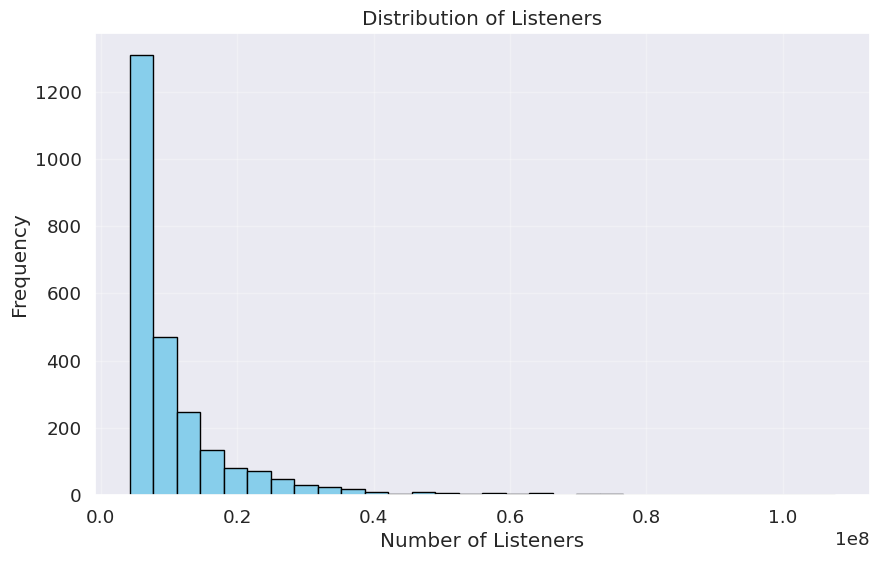

In [15]:
# Histogram for Listeners
plt.figure(figsize=(10, 6))
plt.hist(df['Listeners'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Listeners')
plt.xlabel('Number of Listeners')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('listeners_histogram.png')
plt.show()

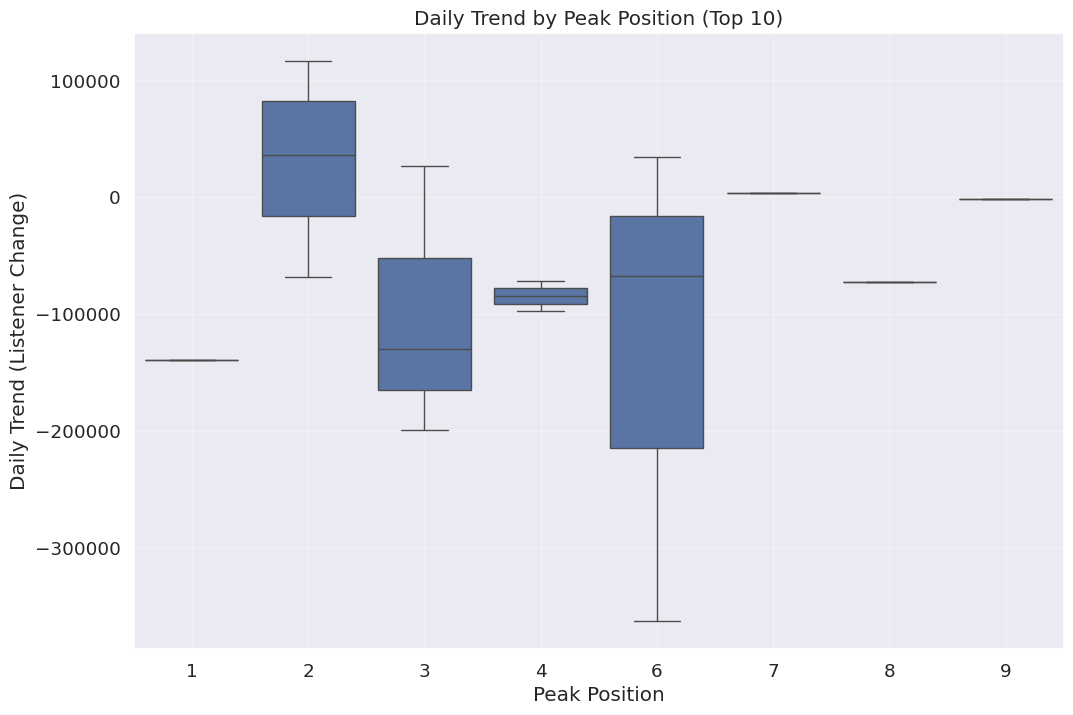

In [16]:
# Box plots for Daily Trend by Peak position (top 10 positions)
top_peaks = df[df['Peak'] <= 10].copy()
plt.figure(figsize=(12, 8))
sns.boxplot(x='Peak', y='Daily Trend', data=top_peaks)
plt.title('Daily Trend by Peak Position (Top 10)')
plt.xlabel('Peak Position')
plt.ylabel('Daily Trend (Listener Change)')
plt.grid(True, alpha=0.3)
plt.savefig('daily_trend_boxplot.png')
plt.show()

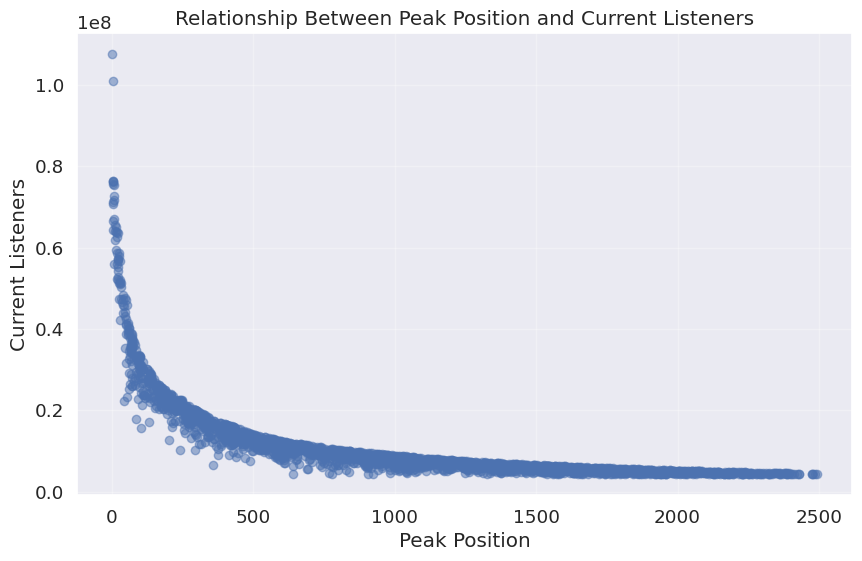

In [17]:
# Additional visualization: Scatter plot of Listeners vs. Peak
plt.figure(figsize=(10, 6))
plt.scatter(df['Peak'], df['Listeners'], alpha=0.5)
plt.title('Relationship Between Peak Position and Current Listeners')
plt.xlabel('Peak Position')
plt.ylabel('Current Listeners')
plt.grid(True, alpha=0.3)
plt.savefig('peak_vs_listeners_scatter.png')
plt.show()

In [18]:
# ## T-test Analysis
# Compare Daily Trend for artists who have reached #1 vs. others

print("\n--- T-Test Analysis ---")
top_artists = df[df['Peak'] == 1]['Daily Trend'].dropna()
other_artists = df[df['Peak'] > 1]['Daily Trend'].dropna()

# Print group info for diagnostic purposes
print(f"Number of artists who reached #1: {len(top_artists)}")
print(f"Number of other artists: {len(other_artists)}")
print(f"Mean Daily Trend for #1 artists: {top_artists.mean():.2f}")
print(f"Mean Daily Trend for other artists: {other_artists.mean():.2f}")

# Check for values in both groups
if len(top_artists) == 0 or len(other_artists) == 0:
    print("Error: One of the groups has no data points.")
else:
    # Perform Welch's t-test (doesn't assume equal variances)
    t_stat, p_val = stats.ttest_ind(top_artists, other_artists, equal_var=False)

    # Print results
    print(f"T-test statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.4f}")


--- T-Test Analysis ---
Number of artists who reached #1: 1
Number of other artists: 2499
Mean Daily Trend for #1 artists: -138880.00
Mean Daily Trend for other artists: 4859.46
T-test statistic: nan
P-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


# Hypothesis testing conclusions
Null Hypothesis: There is no difference in Daily Trend between artists who have reached #1 position and other artists."

Alternative Hypothesis: There is a significant difference in Daily Trend between artists who have reached #1 position and other artists.

Conclusion: {'Reject' if p_val < 0.05 else 'Fail to reject'} the null hypothesis at the 5% significance level.



In [19]:
# Add visualization to support the t-test
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-20-530d062368f7>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=["#1 Artists", "Other Artists"])


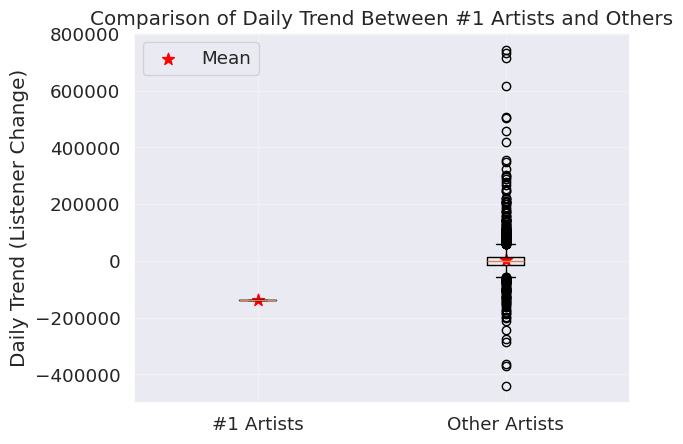

In [20]:
 # Create boxplot comparing the two groups
box_data = [top_artists, other_artists]
plt.boxplot(box_data, labels=["#1 Artists", "Other Artists"])
plt.title('Comparison of Daily Trend Between #1 Artists and Others')
plt.ylabel('Daily Trend (Listener Change)')
plt.grid(True, alpha=0.3)

 # Add mean indicators
means = [top_artists.mean(), other_artists.mean()]
plt.scatter([1, 2], means, color='red', s=80, marker='*', label='Mean')
plt.legend()

plt.savefig('ttest_comparison.png')
plt.show()


--- ANOVA Analysis ---
ANOVA F-statistic: 281.3091
P-value: 0.0000
Null Hypothesis: Mean number of listeners is the same across all peak position groups.
Alternative Hypothesis: At least one peak position group has a different mean number of listeners.
Conclusion: Reject the null hypothesis at the 5% significance level.


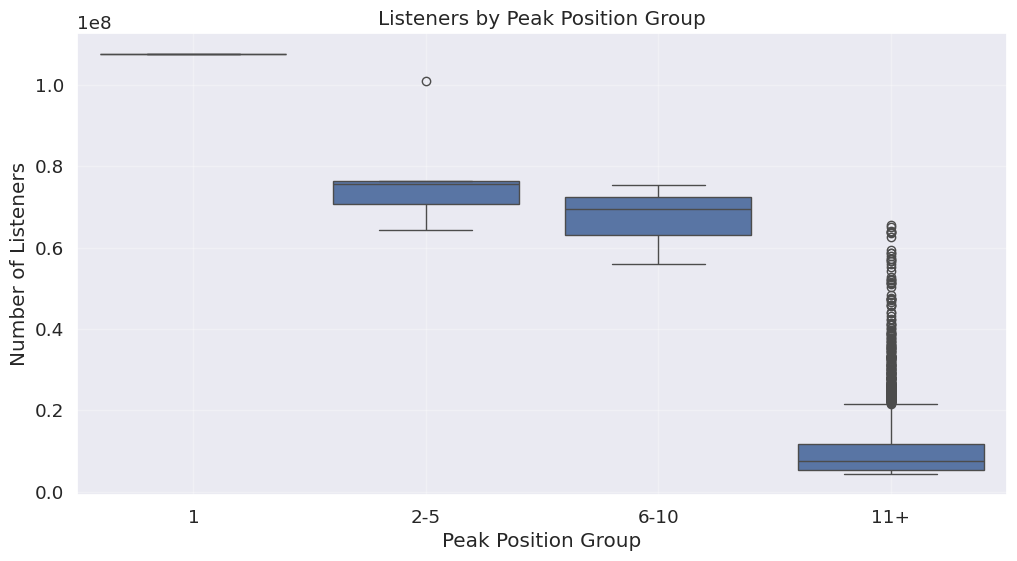

In [21]:
# ## ANOVA Analysis
# Compare Listeners across different peak position groups

print("\n--- ANOVA Analysis ---")
# Create peak position groups (1, 2-5, 6-10, 11+)
df['Peak Group'] = pd.cut(df['Peak'], bins=[0, 1, 5, 10, float('inf')], labels=['1', '2-5', '6-10', '11+'])

# Perform ANOVA
peak_groups = []
peak_group_names = []
for name, group in df.groupby('Peak Group', observed=False)['Listeners']:
    peak_groups.append(group)
    peak_group_names.append(name)

f_stat, p_val_anova = stats.f_oneway(*peak_groups)
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val_anova:.4f}")
print("Null Hypothesis: Mean number of listeners is the same across all peak position groups.")
print("Alternative Hypothesis: At least one peak position group has a different mean number of listeners.")
print(f"Conclusion: {'Reject' if p_val_anova < 0.05 else 'Fail to reject'} the null hypothesis at the 5% significance level.")

# Visualize the ANOVA results
plt.figure(figsize=(12, 6))
sns.boxplot(x='Peak Group', y='Listeners', data=df)
plt.title('Listeners by Peak Position Group')
plt.xlabel('Peak Position Group')
plt.ylabel('Number of Listeners')
plt.grid(True, alpha=0.3)
plt.savefig('anova_visualization.png')
plt.show()

## Statistical Interpretation
Interpretation of Statistics

Based on the calculated statistics, we can extract the following information about the dataset:

1. The dataset contains information about music artists and their listener metrics, including current listeners, daily trends, peak positions, and peak listeners.

2. The distribution of listeners shows significant skewness, suggesting that a small number of artists have disproportionately high listener counts compared to the majority.

3. Daily trend values exhibit both positive and negative changes, indicating that some artists are gaining listeners while others are losing them.

4. The t-test analysis examines whether there's a difference in daily listener trends between artists who have reached the #1 position and other artists, providing insight into whether top artists maintain consistent growth.

5. The ANOVA test compares listener counts across different peak position groups, helping us understand if historical peak performance correlates with current popularity.

6. The box plots reveal how daily listener trends vary across different peak positions, which could indicate whether artists at certain chart positions experience more volatility in their listener base.

These insights help us understand the dynamics of artist popularity, listener behavior, and the relationship between past chart success and current performance.



# Variable Selection Explanation

T-test Variable Selection: I chose 'Daily Trend' as the dependent variable and 'Peak' (specifically, whether an artist reached #1 or not) as the grouping variable for the t-test.

This selection allows us to investigate whether artists who have reached the #1 position experience different daily listener changes compared to other artists. This is interesting because it helps answer whether top-charting artists maintain their popularity differently than others.

ANOVA Variable Selection: For the ANOVA test, I selected 'Listeners' as the dependent variable and created groups based on 'Peak' positions. This selection helps us understand if an artist's historical peak chart position is associated with their current listener count. By creating meaningful groups (artists who peaked at #1, #2-5, 6-10, and #11+), we can investigate whether there are significant differences in current popularity across these achievement tiers.